In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
import pyam
import pandas as pd
import matplotlib.pyplot as plt

import jupyter_black
jupyter_black.load()

plt.style.use("ggplot")

<IPython.core.display.Javascript object>

Load historical data as used in `climate-assessment` package.

In [3]:
hist_df = pd.read_csv(
    "https://github.com/iiasa/climate-assessment/raw/485f3d24fc646ad8d77c65ac5e787a27dc79db04/src/climate_assessment/harmonization/history_ar6.csv"
)

In [4]:
hist_df.head()

,Model,Scenario,Region,Variable,Unit,1750,1751,1752,1753,1754,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,history,scen,World,AR6 climate diagnostics|Emissions|BC|Unharmonized,Mt BC/yr,2.097771,2.072926,2.064312,2.071951,2.099350,...,8.925648,9.284494,9.091851,9.109514,9.665129,9.478877,9.705285,9.560554,9.744380,9.727424
1,history,scen,World,AR6 climate diagnostics|Emissions|PFC|C2F6|Unh...,kt C2F6/yr,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.045423,1.766616,1.746034,1.799551,1.774218,1.846755,1.794986,1.632465,1.651700,1.570000
2,history,scen,World,AR6 climate diagnostics|Emissions|PFC|C6F14|Un...,kt C6F14/yr,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.359559,0.288658,0.274546,0.260430,0.232106,0.232180,0.232253,0.232326,0.299700,0.350000
3,history,scen,World,AR6 climate diagnostics|Emissions|PFC|CF4|Unha...,kt CF4/yr,0.010071,0.010071,0.010071,0.010071,0.010071,...,10.217350,9.327241,9.035343,9.685487,10.489470,11.056837,9.660946,8.302744,9.873500,10.869900
4,history,scen,World,AR6 climate diagnostics|Emissions|CH4|Unharmon...,Mt CH4/yr,19.019783,18.915109,18.889712,19.121377,19.509061,...,356.469690,355.022576,360.491711,364.200363,370.896253,372.657683,380.809767,381.594393,387.873539,388.072796


In [5]:
hist = pyam.IamDataFrame(hist_df)

In [6]:
hist.variable

['AR6 climate diagnostics|Emissions|BC|Unharmonized',
 'AR6 climate diagnostics|Emissions|CH4|Unharmonized',
 'AR6 climate diagnostics|Emissions|CO2|AFOLU|Unharmonized',
 'AR6 climate diagnostics|Emissions|CO2|Energy and Industrial Processes|Unharmonized',
 'AR6 climate diagnostics|Emissions|CO2|Unharmonized',
 'AR6 climate diagnostics|Emissions|CO|Unharmonized',
 'AR6 climate diagnostics|Emissions|F-Gases|Unharmonized',
 'AR6 climate diagnostics|Emissions|HFC|HFC125|Unharmonized',
 'AR6 climate diagnostics|Emissions|HFC|HFC134a|Unharmonized',
 'AR6 climate diagnostics|Emissions|HFC|HFC143a|Unharmonized',
 'AR6 climate diagnostics|Emissions|HFC|HFC227ea|Unharmonized',
 'AR6 climate diagnostics|Emissions|HFC|HFC23|Unharmonized',
 'AR6 climate diagnostics|Emissions|HFC|HFC32|Unharmonized',
 'AR6 climate diagnostics|Emissions|HFC|HFC43-10|Unharmonized',
 'AR6 climate diagnostics|Emissions|HFC|Unharmonized',
 'AR6 climate diagnostics|Emissions|N2O|Unharmonized',
 'AR6 climate diagnostics|E

<Axes: title={'center': 'model: history - scenario: scen - region: World'}, xlabel='Year', ylabel='Mt CO2/yr'>

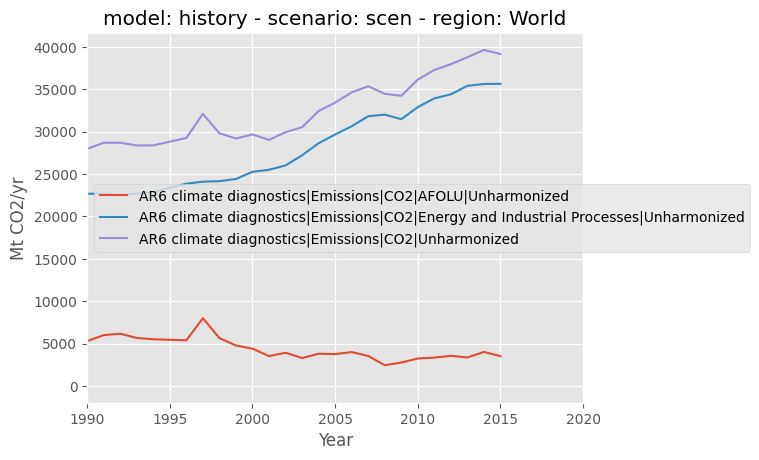

In [7]:
hist.filter(variable="*CO2*").plot(xlim=[1990, 2020])

Load emissions data from [IGCC](https://www.igcc.earth/) assessment.

In [8]:
igcc = pd.read_csv(
    "https://github.com/ClimateIndicator/GHG-Emissions-Assessment/raw/edd48a54187b8ee6f16d6c8a5735970cd1499bce/results/ghg_emissions_co2e.csv"
)

In [9]:
igcc = igcc.drop("units", axis=1)
igcc = igcc.set_index("year")
igcc

,F-gases,N2O,CH4,CO2-LULUCF,CO2-FFI
year,,,,,
1750,0.032113,0.033033,0.75051,NaN,NaN
1751,0.032113,0.033579,0.75330,NaN,NaN
1752,0.032113,0.034125,0.75609,NaN,NaN
1753,0.032113,0.034671,0.75609,NaN,NaN
1754,0.032113,0.035217,0.75888,NaN,NaN
...,...,...,...,...,...
2017,1.779289,2.784600,8.67690,4.335100,36.123011
2018,1.848456,2.811900,8.78850,4.184400,36.853309
2019,1.831064,2.839200,8.78850,4.560600,37.109548


Calculate change rates to use with the `climate-assessment` historical data.

In [10]:
change_rate = igcc.pct_change()
change_rate.tail()

,F-gases,N2O,CH4,CO2-LULUCF,CO2-FFI
year,,,,,
2017,0.082351,0.009901,0.006472,-0.043266,0.016117
2018,0.038874,0.009804,0.012862,-0.034763,0.020217
2019,-0.009409,0.009709,0.000000,0.089905,0.006953
2020,0.041268,0.000000,0.003175,-0.109610,-0.049039
2021,0.023341,0.028846,0.006329,-0.029256,0.052738


In [11]:
mapping = {
    "AR6 climate diagnostics|Emissions|CO2|Energy and Industrial Processes|Unharmonized": "CO2-FFI",
    "AR6 climate diagnostics|Emissions|CO2|AFOLU|Unharmonized": "CO2-LULUCF",
    "AR6 climate diagnostics|Emissions|CH4|Unharmonized": "CH4",
    "AR6 climate diagnostics|Emissions|N2O|Unharmonized": "N2O",
    "AR6 climate diagnostics|Emissions|F-Gases|Unharmonized": "F-gases",
}

Extend data.

In [12]:
for year in range(2016, 2022):
    hist_df[str(year)] = None
    for k, v in mapping.items():
        print(k)
        value = hist_df[hist_df.Variable == k][str(year - 1)].values[0]
        idx = hist_df[hist_df.Variable == k][str(year)].index.values[0]
        hist_df.loc[idx, str(year)] = value + (value * change_rate[v][year])

AR6 climate diagnostics|Emissions|CO2|Energy and Industrial Processes|Unharmonized
AR6 climate diagnostics|Emissions|CO2|AFOLU|Unharmonized
AR6 climate diagnostics|Emissions|CH4|Unharmonized
AR6 climate diagnostics|Emissions|N2O|Unharmonized
AR6 climate diagnostics|Emissions|F-Gases|Unharmonized
AR6 climate diagnostics|Emissions|CO2|Energy and Industrial Processes|Unharmonized
AR6 climate diagnostics|Emissions|CO2|AFOLU|Unharmonized
AR6 climate diagnostics|Emissions|CH4|Unharmonized
AR6 climate diagnostics|Emissions|N2O|Unharmonized
AR6 climate diagnostics|Emissions|F-Gases|Unharmonized
AR6 climate diagnostics|Emissions|CO2|Energy and Industrial Processes|Unharmonized
AR6 climate diagnostics|Emissions|CO2|AFOLU|Unharmonized
AR6 climate diagnostics|Emissions|CH4|Unharmonized
AR6 climate diagnostics|Emissions|N2O|Unharmonized
AR6 climate diagnostics|Emissions|F-Gases|Unharmonized
AR6 climate diagnostics|Emissions|CO2|Energy and Industrial Processes|Unharmonized
AR6 climate diagnostics|Em

Create scenario with constant values from 2021.

In [13]:
persistence = hist_df.dropna().copy()

persistence.Model = "Polyclimate"
persistence.Scenario = "Persistence"

for i in range(2022, 2101, 1):
    persistence[str(i)] = persistence[persistence.columns[-1]]

for i in range(1750, 2010, 1):
    persistence = persistence.drop(str(i), axis=1)

persistence

,Model,Scenario,Region,Variable,Unit,2010,2011,2012,2013,2014,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
4,Polyclimate,Persistence,World,AR6 climate diagnostics|Emissions|CH4|Unharmon...,Mt CH4/yr,370.896253,372.657683,380.809767,381.594393,387.873539,...,401.977684,401.977684,401.977684,401.977684,401.977684,401.977684,401.977684,401.977684,401.977684,401.977684
6,Polyclimate,Persistence,World,AR6 climate diagnostics|Emissions|CO2|AFOLU|Un...,Mt CO2/yr,3243.438262,3348.037995,3557.037995,3366.371329,4015.371329,...,2572.61208,2572.61208,2572.61208,2572.61208,2572.61208,2572.61208,2572.61208,2572.61208,2572.61208,2572.61208
7,Polyclimate,Persistence,World,AR6 climate diagnostics|Emissions|CO2|Energy a...,Mt CO2/yr,32890.397800,33917.991260,34396.873880,35396.339700,35615.576730,...,37203.948149,37203.948149,37203.948149,37203.948149,37203.948149,37203.948149,37203.948149,37203.948149,37203.948149,37203.948149
16,Polyclimate,Persistence,World,AR6 climate diagnostics|Emissions|N2O|Unharmon...,kt N2O/yr,10539.817000,10446.428330,10593.897730,10759.046880,10866.283520,...,11674.674675,11674.674675,11674.674675,11674.674675,11674.674675,11674.674675,11674.674675,11674.674675,11674.674675,11674.674675
24,Polyclimate,Persistence,World,AR6 climate diagnostics|Emissions|F-Gases|Unha...,Mt CO2-equiv/yr,928.727355,1034.876878,1060.368049,1016.055511,1131.243527,...,1627.824719,1627.824719,1627.824719,1627.824719,1627.824719,1627.824719,1627.824719,1627.824719,1627.824719,1627.824719


-5% each year from 2022.

In [14]:
minus5 = hist_df.dropna().copy()

minus5.Model = "Polyclimate"
minus5.Scenario = "Minus-5"

for i in range(2022, 2101, 1):
    minus5[str(i)] = minus5[minus5.columns[-1]] - 0.05 * minus5[minus5.columns[-1]]

for i in range(1750, 2010, 1):
    minus5 = minus5.drop(str(i), axis=1)

minus5.head()

,Model,Scenario,Region,Variable,Unit,2010,2011,2012,2013,2014,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
4,Polyclimate,Minus-5,World,AR6 climate diagnostics|Emissions|CH4|Unharmon...,Mt CH4/yr,370.896253,372.657683,380.809767,381.594393,387.873539,...,11.088028,10.533627,10.006945,9.506598,9.031268,8.579705,8.150719,7.743183,7.356024,6.988223
6,Polyclimate,Minus-5,World,AR6 climate diagnostics|Emissions|CO2|AFOLU|Un...,Mt CO2/yr,3243.438262,3348.037995,3557.037995,3366.371329,4015.371329,...,70.962135,67.414028,64.043327,60.841161,57.799103,54.909148,52.16369,49.555506,47.07773,44.723844
7,Polyclimate,Minus-5,World,AR6 climate diagnostics|Emissions|CO2|Energy a...,Mt CO2/yr,32890.397800,33917.991260,34396.873880,35396.339700,35615.576730,...,1026.222189,974.911079,926.165525,879.857249,835.864387,794.071167,754.367609,716.649228,680.816767,646.775929
16,Polyclimate,Minus-5,World,AR6 climate diagnostics|Emissions|N2O|Unharmon...,kt N2O/yr,10539.817000,10446.428330,10593.897730,10759.046880,10866.283520,...,322.030612,305.929082,290.632627,276.100996,262.295946,249.181149,236.722092,224.885987,213.641688,202.959603
24,Polyclimate,Minus-5,World,AR6 climate diagnostics|Emissions|F-Gases|Unha...,Mt CO2-equiv/yr,928.727355,1034.876878,1060.368049,1016.055511,1131.243527,...,44.901413,42.656342,40.523525,38.497349,36.572482,34.743858,33.006665,31.356331,29.788515,28.299089


1% increase every year from 2022.

In [15]:
plus1 = hist_df.dropna().copy()

plus1.Model = "Polyclimate"
plus1.Scenario = "Plus-1"

for i in range(2022, 2101, 1):
    plus1[str(i)] = plus1[plus1.columns[-1]] + 0.01 * plus1[plus1.columns[-1]]

for i in range(1750, 2010, 1):
    plus1 = plus1.drop(str(i), axis=1)

plus1

,Model,Scenario,Region,Variable,Unit,2010,2011,2012,2013,2014,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
4,Polyclimate,Plus-1,World,AR6 climate diagnostics|Emissions|CH4|Unharmon...,Mt CH4/yr,370.896253,372.657683,380.809767,381.594393,387.873539,...,806.674091,814.740832,822.888241,831.117123,839.428294,847.822577,856.300803,864.863811,873.512449,882.247574
6,Polyclimate,Plus-1,World,AR6 climate diagnostics|Emissions|CO2|AFOLU|Un...,Mt CO2/yr,3243.438262,3348.037995,3557.037995,3366.371329,4015.371329,...,5162.623683,5214.24992,5266.392419,5319.056343,5372.246906,5425.969375,5480.229069,5535.03136,5590.381673,5646.28549
7,Polyclimate,Plus-1,World,AR6 climate diagnostics|Emissions|CO2|Energy a...,Mt CO2/yr,32890.397800,33917.991260,34396.873880,35396.339700,35615.576730,...,74659.520305,75406.115509,76160.176664,76921.77843,77690.996215,78467.906177,79252.585238,80045.111091,80845.562202,81654.017824
16,Polyclimate,Plus-1,World,AR6 climate diagnostics|Emissions|N2O|Unharmon...,kt N2O/yr,10539.817000,10446.428330,10593.897730,10759.046880,10866.283520,...,23428.309475,23662.59257,23899.218496,24138.21068,24379.592787,24623.388715,24869.622602,25118.318828,25369.502017,25623.197037
24,Polyclimate,Plus-1,World,AR6 climate diagnostics|Emissions|F-Gases|Unha...,Mt CO2-equiv/yr,928.727355,1034.876878,1060.368049,1016.055511,1131.243527,...,3266.659016,3299.325606,3332.318862,3365.642051,3399.298471,3433.291456,3467.624371,3502.300614,3537.32362,3572.696857


In [16]:
df = pd.concat([persistence, minus5, plus1])

In [17]:
iamdf = pyam.IamDataFrame(df)

In [18]:
iamdf.variable

['AR6 climate diagnostics|Emissions|CH4|Unharmonized',
 'AR6 climate diagnostics|Emissions|CO2|AFOLU|Unharmonized',
 'AR6 climate diagnostics|Emissions|CO2|Energy and Industrial Processes|Unharmonized',
 'AR6 climate diagnostics|Emissions|F-Gases|Unharmonized',
 'AR6 climate diagnostics|Emissions|N2O|Unharmonized']

<Axes: title={'center': 'model: Polyclimate - region: World - variable: AR6 climate diagnostics|Emissions|CO2|Energy and Industrial Processes|Unharmonized'}, xlabel='Year', ylabel='Mt CO2/yr'>

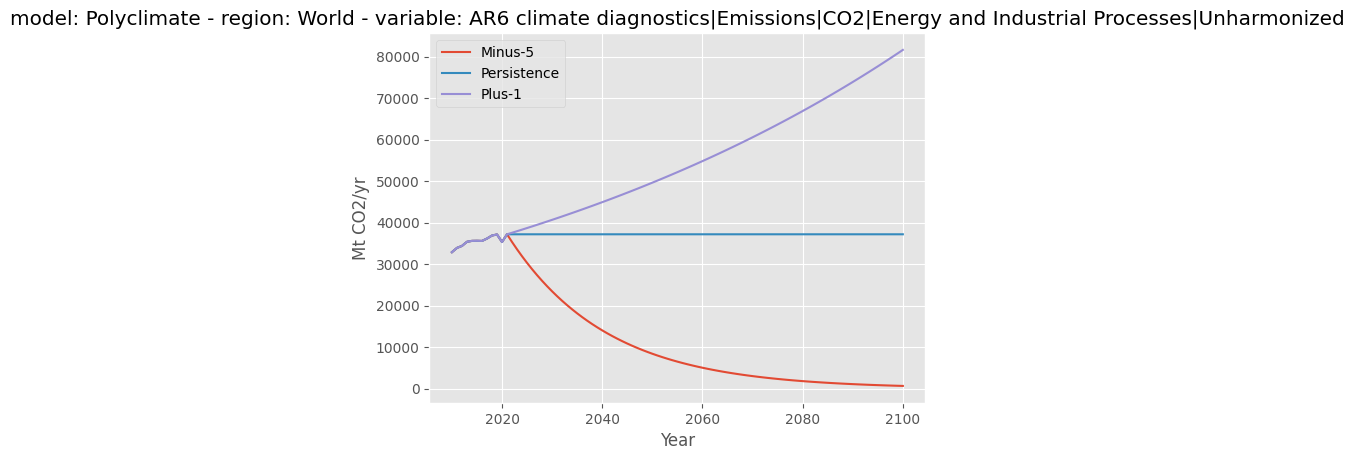

In [19]:
iamdf.filter(
    variable="AR6 climate diagnostics|Emissions|CO2|Energy and Industrial Processes|Unharmonized"
).plot()

<Axes: title={'center': 'model: Polyclimate - region: World - variable: AR6 climate diagnostics|Emissions|CO2|Energy and Industrial Processes|Unharmonized'}, xlabel='Year', ylabel='Mt CO2/yr'>

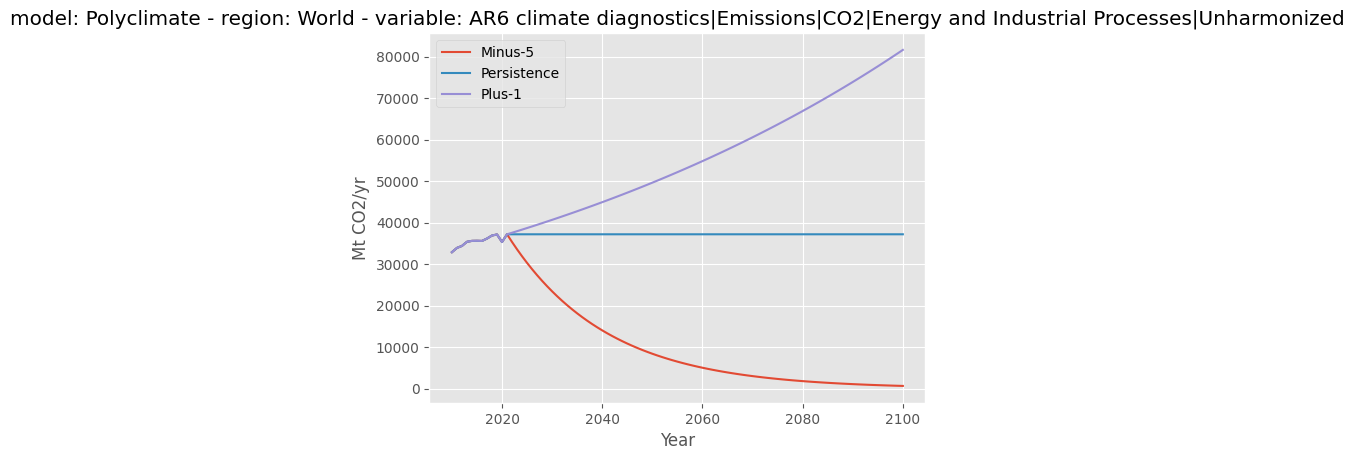

In [20]:
iamdf.filter(
    variable="AR6 climate diagnostics|Emissions|CO2|Energy and Industrial Processes|Unharmonized"
).plot()

<Axes: title={'center': 'model: Polyclimate - region: World - variable: AR6 climate diagnostics|Emissions|CO2|AFOLU|Unharmonized'}, xlabel='Year', ylabel='Mt CO2/yr'>

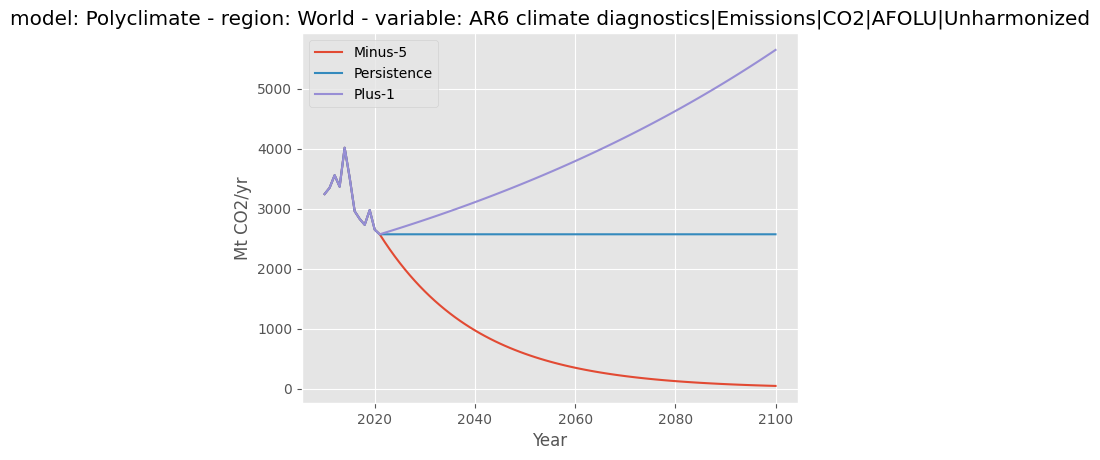

In [21]:
iamdf.filter(variable="AR6 climate diagnostics|Emissions|CO2|AFOLU|Unharmonized").plot()

<Axes: title={'center': 'model: Polyclimate - region: World - variable: AR6 climate diagnostics|Emissions|CH4|Unharmonized'}, xlabel='Year', ylabel='Mt CH4/yr'>

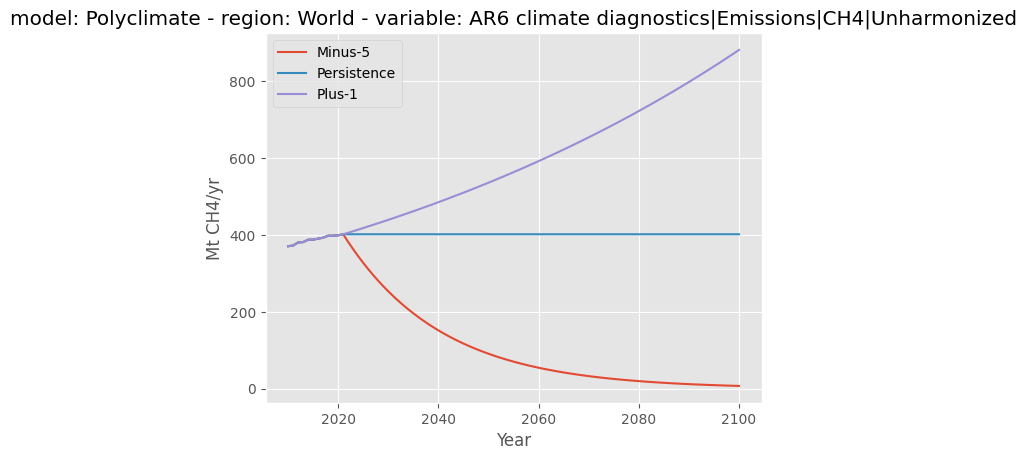

In [22]:
iamdf.filter(variable="AR6 climate diagnostics|Emissions|CH4|Unharmonized").plot()

<Axes: title={'center': 'model: Polyclimate - region: World - variable: AR6 climate diagnostics|Emissions|N2O|Unharmonized'}, xlabel='Year', ylabel='kt N2O/yr'>

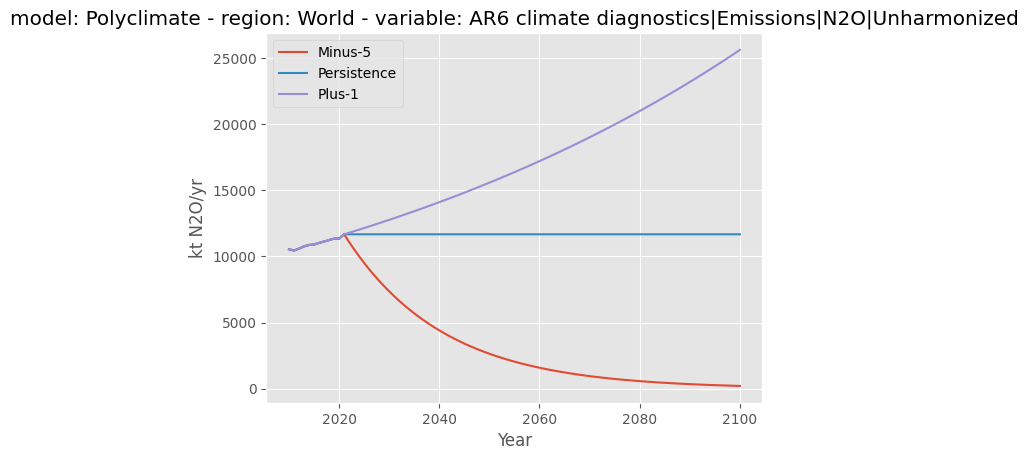

In [23]:
iamdf.filter(variable="AR6 climate diagnostics|Emissions|N2O|Unharmonized").plot()

In [24]:
df.Variable = df.Variable.apply(
    lambda x: x.replace("AR6 climate diagnostics|", "").replace("|Unharmonized", "")
)
df.to_csv("polyclimate.csv", index=False)

Test reading in data.

In [25]:
pyam.IamDataFrame("polyclimate.csv")

INFO:pyam.core:Reading file polyclimate.csv


<class 'pyam.core.IamDataFrame'>
Index:
 * model    : Polyclimate (1)
 * scenario : Minus-5, Persistence, Plus-1 (3)
Timeseries data coordinates:
   region   : World (1)
   variable : Emissions|CH4, Emissions|CO2|AFOLU, ... Emissions|N2O (5)
   unit     : Mt CH4/yr, Mt CO2-equiv/yr, Mt CO2/yr, kt N2O/yr (4)
   year     : 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, ... 2100 (91)
Meta indicators:
   exclude (bool) False (1)